Importierung der wichtigen Bibliotheken

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as make_subplots
import plotly.graph_objects as go


einlesen der Csv Datei

In [2]:
df = pd.read_csv("train.csv")
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Balkendiagramm unserer Kardinalen Variablen

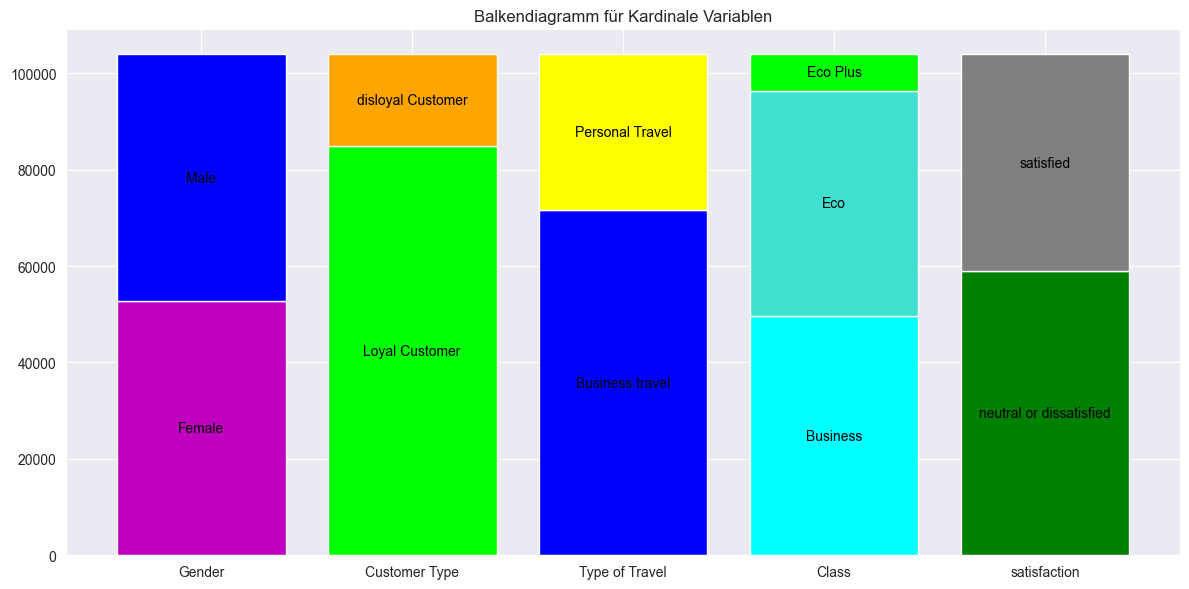

In [3]:
columns = ['Gender','Customer Type', 'Type of Travel', 'Class', 'satisfaction']

x_positions = range(len(columns))

fig, ax = plt.subplots(figsize=[12,6])


palette = {
    'Gender': ['m','b'],
    'Customer Type': ['lime','orange'],
    'Type of Travel': ['blue','yellow'],
    'satisfaction': ['green','gray'],
    'Class': ['cyan', 'turquoise', 'lime']
}

legend_entries = {}

for col_indx, col in enumerate(columns):
    counts = df[col].value_counts()
    bottom = 0
    colors = palette[col]
    
    for i, (cat,val) in enumerate(counts.items()):
        color = colors[i% len(colors)]
        ax.bar(col_indx, val, bottom=bottom, color=color)
        ax.text(col_indx, bottom + val/2, str(cat), ha='center', va='center', color='black')
        bottom += val
        if cat not in legend_entries:
            legend_entries[cat] = color

ax.set_xticks(list(x_positions))
ax.set_xticklabels(columns)

handles = [plt.Rectangle((0,0),1,1, color = color) for color in legend_entries.values()]
labels = list(legend_entries.keys())
plt.title("Balkendiagramm für Kardinale Variablen")
plt.tight_layout()
plt.show()

### Zur Analyse der kategorischen Variablen (wie Geschlecht, Klasse oder Kundentyp) nutzen wir ein gestapeltes Balkendiagramm. Diese Visualisierung bietet einen sofortigen Überblick über die Zusammensetzung unserer Passagierdaten und zeigt auf einen Blick, welche Gruppen im Datensatz dominieren.

## Die relevanten Erkenntnisse für die weitere Analyse sind:

- Geschlecht: Der Datensatz ist sehr ausgewogen; es gibt fast gleich viele   Frauen wie Männer.

- Kundentyp: Hier zeigt sich ein deutliches Ungleichgewicht. Etwa 75 % der -Befragten sind loyale Kunden.

- Klasse: Auch hier ist die Verteilung ungleichmäßig. Die Klasse Eco Plus nimmt im Vergleich zu Eco und Business nur einen verschwindend geringen Anteil ein.

- Reisegrund (Type of Travel): Beim Reisegrund dominiert Business Travel gegenüber Personal Travel mit einem Verhältnis von annähernd 2 zu 1.

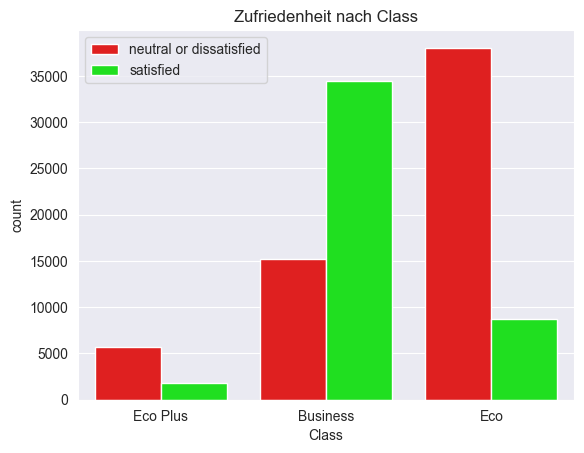

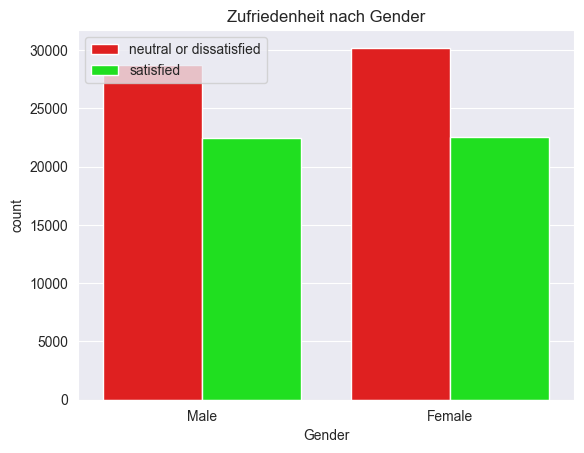

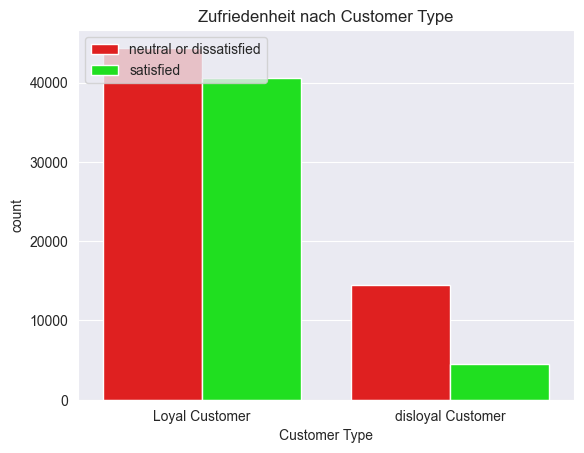

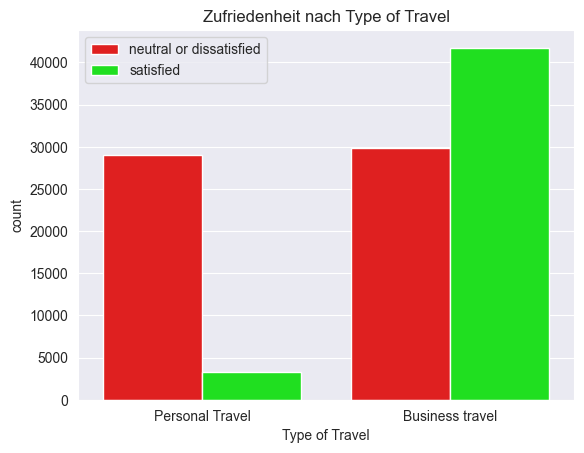

In [4]:
columns = ["Class","Gender","Customer Type","Type of Travel",]
for column in columns:
    sns.countplot(x= column, hue = "satisfaction", data = df, palette = ["red", "lime"])
    plt.title(f"Zufriedenheit nach {column}")
    plt.legend(loc = "upper left")
    plt.show()

Hier nutzten wir Balken-Diagramme um uns einen Überblick darüber zu verschaffen, wie die einzelnen EInträge im Verhältnis stehen.
## 1. Zufriedenheit nach Flugklasse (Class)
- Das erste Diagramm dient dazu, die Zufriedenheitsverteilung in Abhängigkeit von der Flugklasse zu verdeutlichen:

- Business Class: Passagiere der Business Class zeigen eine deutlich höhere Zufriedenheit. Das Verhältnis von zufriedenen zu unzufriedenen Personen ist hier mehr als 2:1 (doppelt so viele sind zufrieden wie unzufrieden).

- Economy & Economy Plus: Im Gegensatz dazu ist die Zufriedenheit sowohl in der Economy als auch in der Economy Plus Klasse äußerst gering.

## 2. Zufriedenheit nach Geschlecht (Gender)
- Dieses Diagramm untersucht, ob das Geschlecht einen Einfluss auf die  allgemeine Zufriedenheit hat:

- Die Analyse zeigt, dass das Verhältnis von Zufriedenheit zu Unzufriedenheit  nicht wesentlich vom Geschlecht abhängt. Die Verteilung ist über beide Geschlechter hinweg relativ konstant.

- Das Schaubild bestätigt zudem den allgemeinen Trend im Datensatz, dass die Mehrheit der Befragten eher neutral oder unzufrieden ist ("dissatisfied") als zufrieden ("satisfied").

## 3. Zufriedenheit bei loyalen und disloyalen Kunden
- Das dritte Histogramm vergleicht die Zufriedenheit zwischen loyalen und disloyalen Kunden:

- Es fällt klar auf, dass loyale Kunden im Durchschnitt zufriedener sind als disloyale Kunden. Dies unterstreicht die Wichtigkeit der Kundenbindung für die allgemeine Zufriedenheit.

## 4. Zufriedenheit nach Reisezweck (Type of Travel)
-Das letzte Diagramm stellt die Kundenzufriedenheit im Kontext des Reisezwecks dar:

- Unzufriedene Kunden: Die Anzahl der unzufriedenen Personen ist in beiden Kategorien ("Personal Travel" und "Business Travel") ungefähr gleich.

- Signifikanter Unterschied: Der gravierendste Unterschied liegt im Anteil der zufriedenen Kunden:

- Personal Travel: Nur ein kleiner Bruchteil der Reisenden ist zufrieden.

- Business Travel: Hier sind deutlich mehr Reisende zufrieden als unzufrieden.

Insgesamt empfinden wir auch hier die Darstellung als Balkendiagramm als praktisch. 

# Zentrale Ergebnisse
## Die Balkendiagramme zeigen deutliche Unterschiede in der Kundenzufriedenheit basierend auf den analysierten Faktoren:

### Flugklasse: 
Die Business Class zeigt eine sehr hohe Zufriedenheit (mehr als 2:1), während die Economy Klassen extrem unzufrieden sind.

### Geschlecht: 
Das Zufriedenheitsverhältnis hängt nicht vom Geschlecht ab und bestätigt den allgemeinen Trend, dass die Mehrheit der Kunden eher neutral oder unzufrieden ist.

### Kundenart: 
Loyale Kunden sind signifikant zufriedener als disloyale Kunden.

### Reisezweck: 
Business Travel weist eine hohe Zufriedenheit auf. Im Gegensatz dazu ist bei Personal Travel nur ein Bruchteil der Reisenden zufrieden, obwohl die Anzahl der Unzufriedenen vergleichbar ist.

# Benfords Law

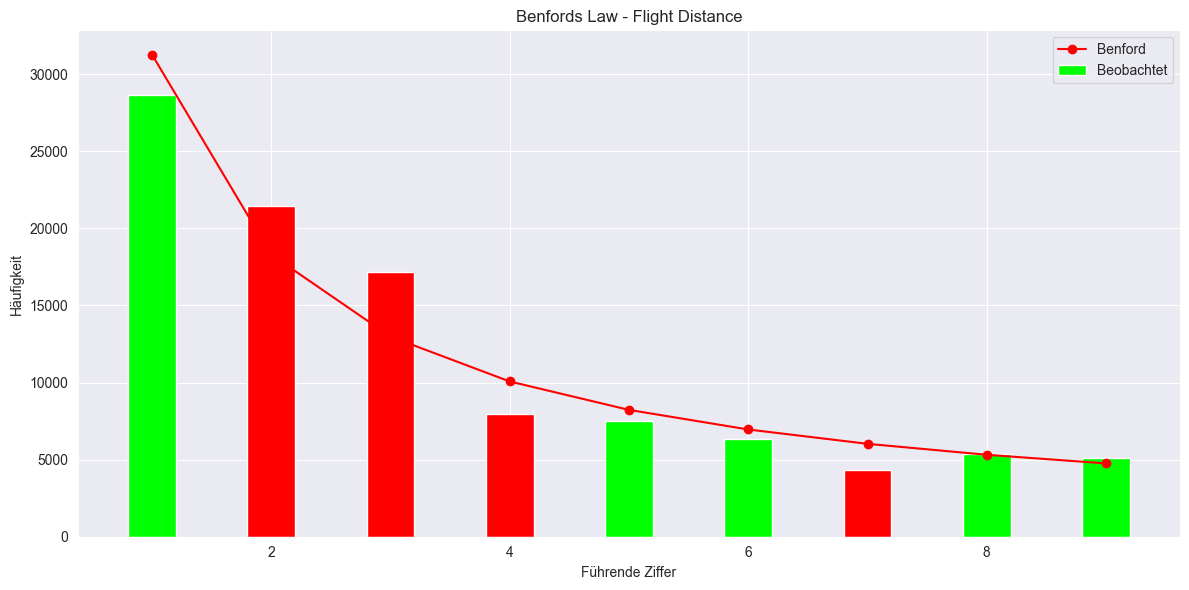

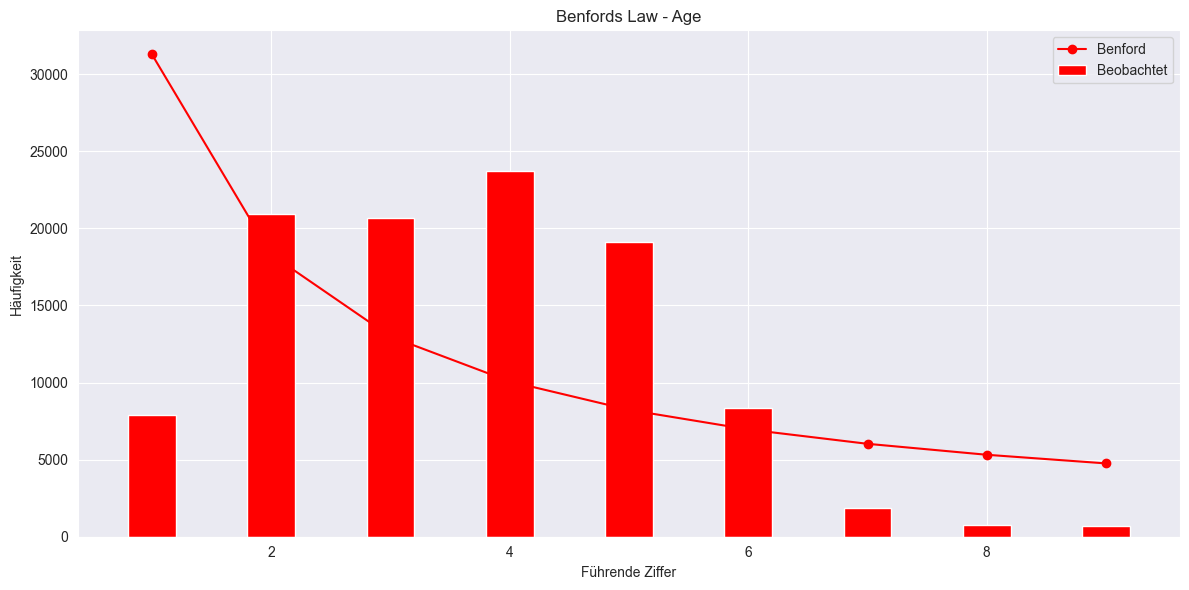

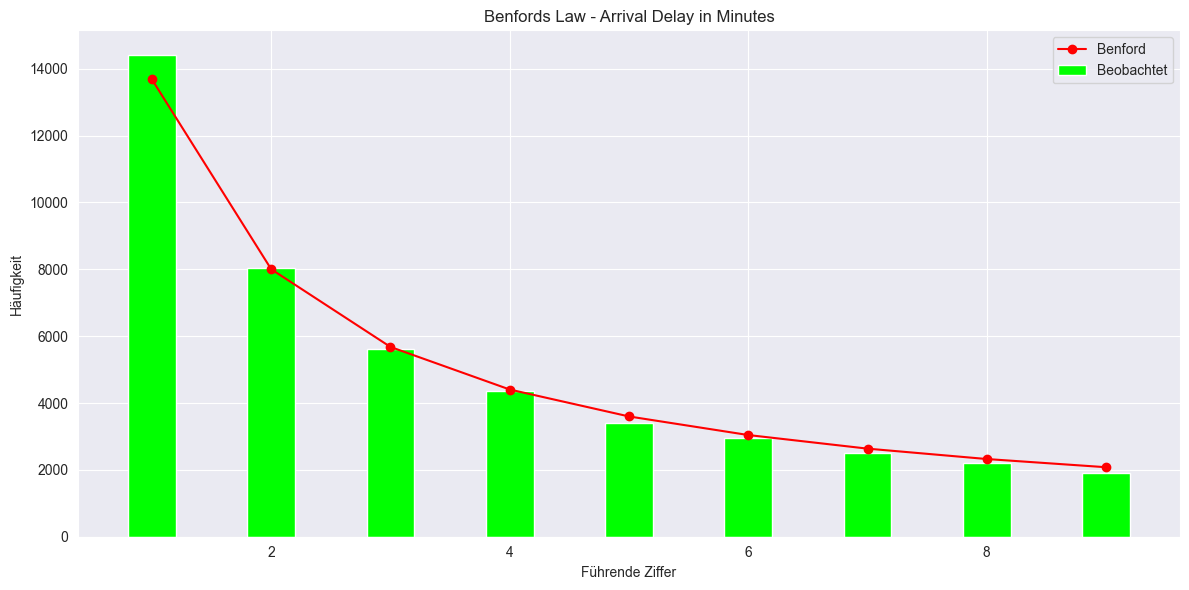

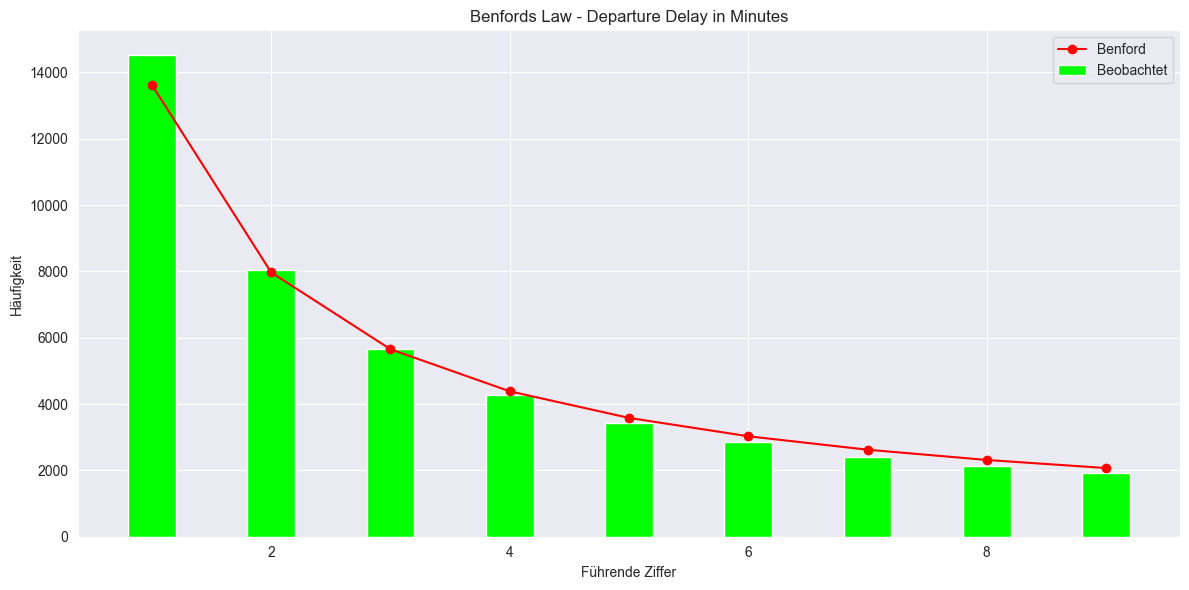

In [5]:
columns = ["Flight Distance","Age","Arrival Delay in Minutes", "Departure Delay in Minutes"]


for column in columns:

    values = df[column].dropna()
    values = values[values > 0]

    # Extrahieren der führenden Ziffern
    leading = values.astype(str).str[0].astype(int)
    
    # Häufigkeiten der führenden Ziffern berechnen
    observed_counts = leading.value_counts().sort_index()
    
    # Benfordslaw Verteilungs erstellung
    benford = pd.Series({d: np.log10(1+1/d) for d in range(1,10)})* len(leading)

    # Farben basierend auf Abweichung von Benford
    colors = ["Lime" if abs(observed_counts[i]- benford[i])/ benford[i] < 0.1 else "Red" for i in range(1,10)]

    plt.figure(figsize=[12,6])
    plt.bar(observed_counts.index ,observed_counts.values, width = 0.4, label = "Beobachtet", color = colors)


    plt.plot(observed_counts.index  , benford, 'ro-' ,label = "Benford")
    plt.xlabel("Führende Ziffer")
    plt.ylabel("Häufigkeit")
    plt.title(f"Benfords Law - {column}")
    plt.legend()
    plt.tight_layout()
    plt.show()


    """ 
    abweichungen = abs(observed_counts.values - benford.values)/ benford.values
    mittlere_abweichung =abweichungen.mean() * 100
    print(f"{mittlere_abweichung}")
    print(f"{abweichungen}")
    if mittlere_abweichung < 10:
        print("Folgt Benford")
    else:
        print("Folgt Benford nicht") """

# Ergebnisse: Folgen die Daten Benford?
Da eine Folge, die nicht exakt dem Benford-Gesetz entspricht streng genommen nicht wirklich folgen kann, haben wir vereinbart, dass wir eine folge als Benford-Konform betrachten, wenn die mittlere Abweichung unter 10 % liegt. Somit haben wir ein erstes Indiz dafür, dass unser Datensatz nicht manipuliert wurde und die Daten glaubwürdig sind.
## 1.Flight Distance
- Bei der Auswertung zeigt sich ein abnehmender Trend wie bei Benford, dieser ist jedoch zu Beginn deutlich schwächer ausgeprägt. Konkret betragt die Abweichung für die Zweite und dritte Ziffer 0.17 bzw 0,32.
## 2.Age
- Die Variable Age zeigt keinerlei Übereinstimmung mit Benfords Law und folgt eher einer Normalverteilung. Davon war von auszugehen, da die Altersverteilung natürlich nicht dem Benfords Law folgt.
## 3.Arrivel Delay in Minutes und 4.Departure Delay in Minutes
- Sowohl Arrival als auch Departure Delay folgen konsequent dem Benfords Law.


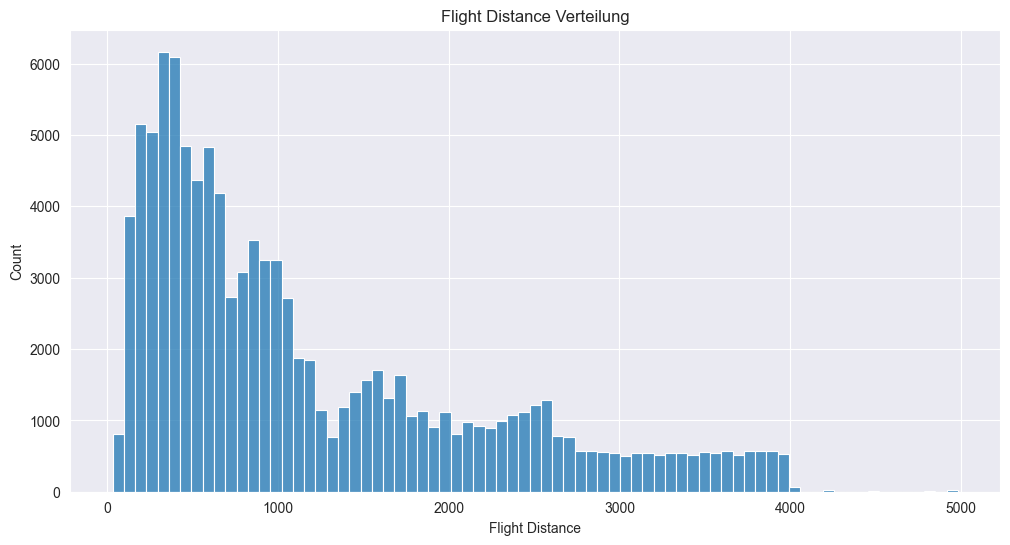

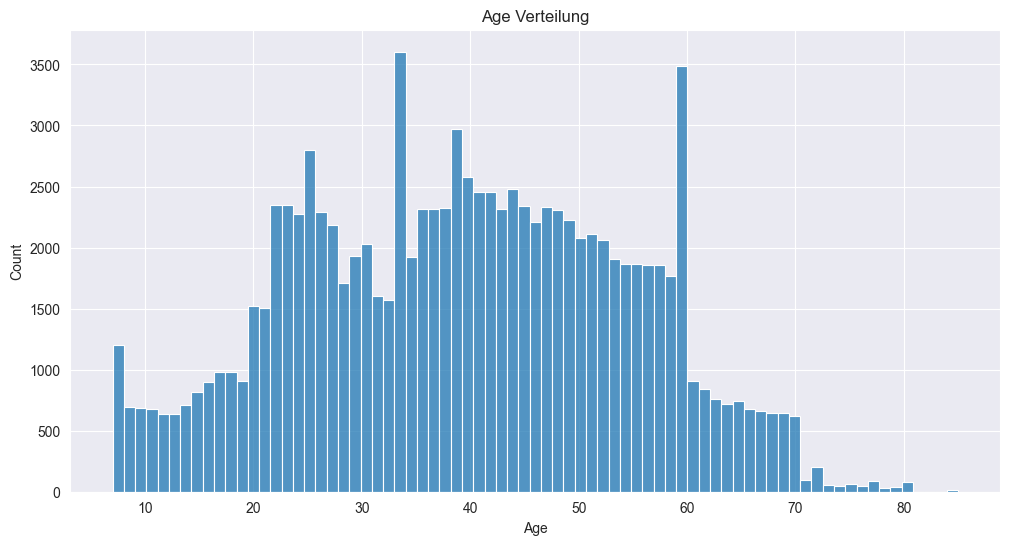

In [6]:
columns = ["Flight Distance","Age"]

for column in columns:
    plt.figure(figsize=[12,6])
    sns.histplot(df[column], bins = 75)
    plt.title(f"{column} Verteilung")
    plt.show()

# Flight Distance
Aus dem Diagramm lässt sich herauslesen, dass ein großteil aller Flüge unter 1500 Meilen hat. Flugdistanzen darüber hinaus sind noch relativ häufig bis ca 4000 Meilen. Längere Flüge sind selten.



# Age Verteilung
Auffallend ist, dass es einige Bewertungen von unter 10 Jährigen gibt und generell einige Bewertungen von Minderjährigen.
Der großteil der Beobachteten liegt zwischen 20 und 60. Danach gibt es noch einige Beurteilungen von Menschen bis ca 70 welche Mengenteschnisch passend zur Menge der Bewertungen von Minderjährigen. Bewertungen von über 70 Jährigen sind vergleichsweise unwichtig.

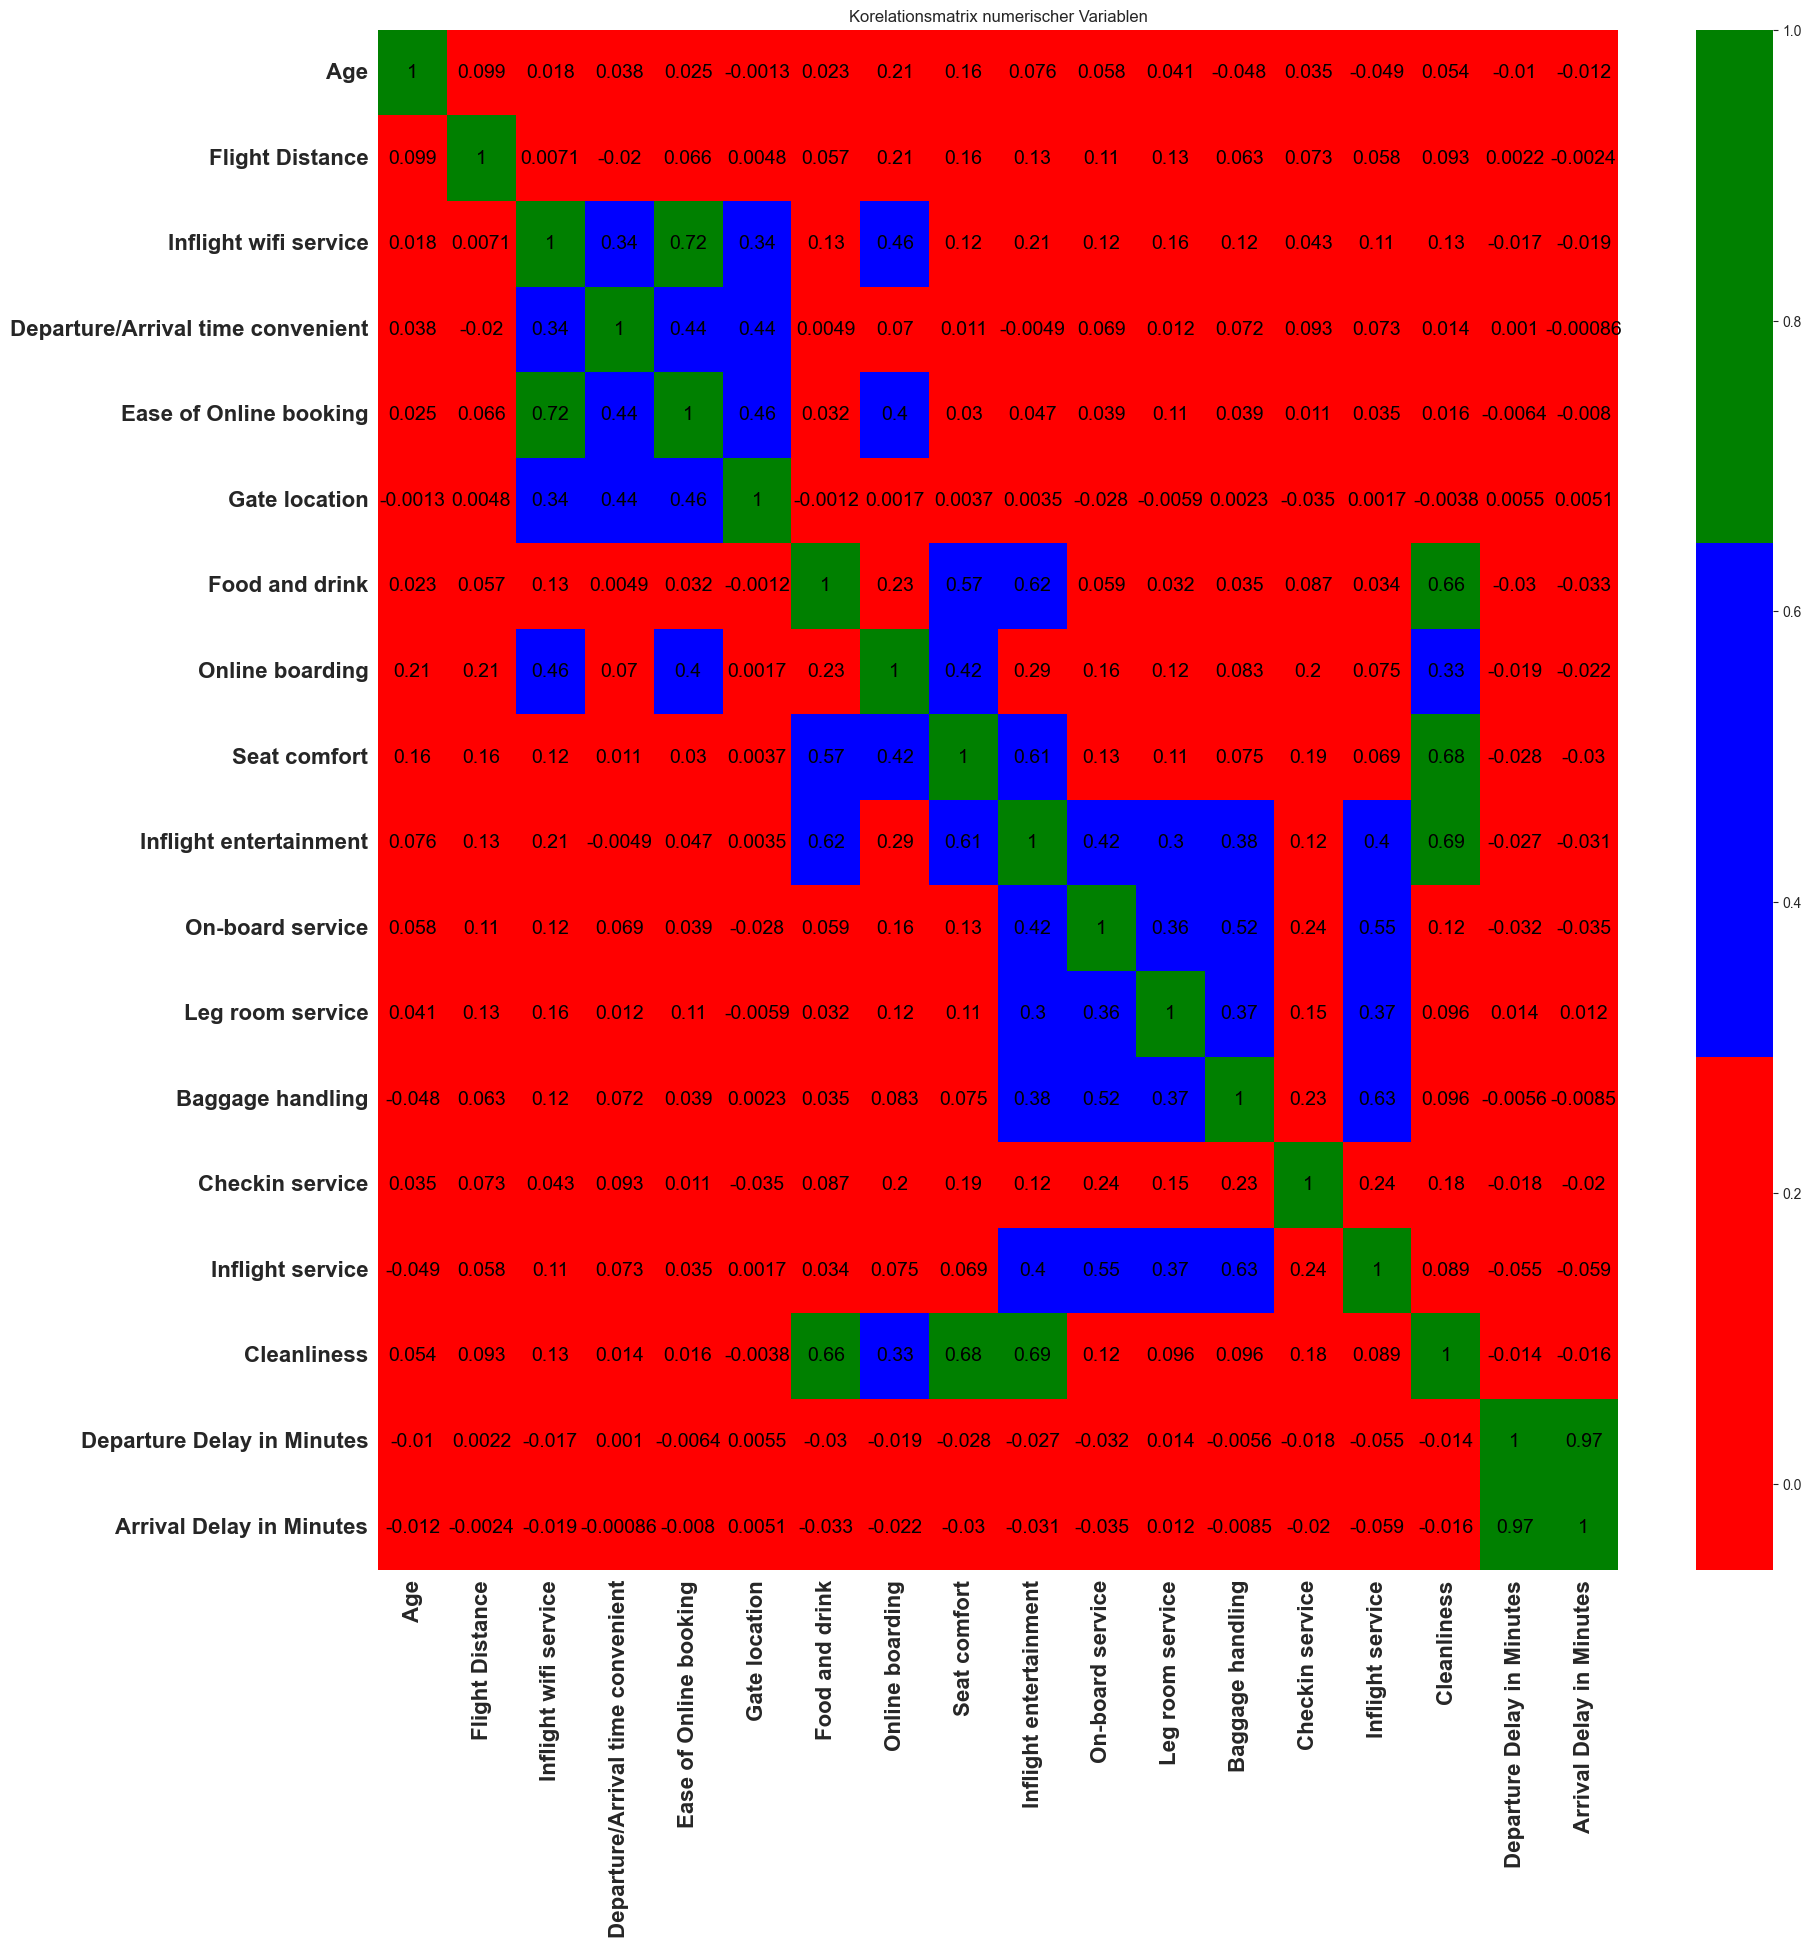

In [7]:
num_cols = df.select_dtypes(include= np.number).columns.drop(["id","Unnamed: 0"])
corr = df[num_cols].corr()
plt.figure(figsize=[20,20])
sns.heatmap(corr, annot = True, cmap = ["Red","Blue","Green"], annot_kws={"size": 14, "fontname": "Arial", "color": "black"})
plt.title("Korelationsmatrix numerischer Variablen")


# Achsenbeschriftungen größer machen
plt.xticks(fontsize=16, fontweight="bold", rotation=90)
plt.yticks(fontsize=16, fontweight="bold", rotation=0)

plt.show()

## Analyse der Korrelationsmatrix

Im Folgenden werden die signifikanten Korrelationen der verschiedenen numerischen Merkmale analysiert und interpretiert.

### Age & Flight Distance
Keine signifikanten Korrelationen.

### Inflight Wifi Service
- Korreliert mit: Ease of Online booking, Online Boarding, Gate Location, Departure/Arrival time convenient.
- Interpretation: Diese Korrelationen wirken zunächst unintuitiv, da die Buchung vor dem Flug stattfindet. Sie deuten jedoch auf eine bestimmte Kundengruppe hin (z. B. Business-Reisende), die generell hohe Ansprüche an digitale Konnektivität stellt – sowohl beim Buchungsprozess als auch an Bord. Zudem verfügen Airlines mit gutem Wifi oft generell über eine modernere IT-Infrastruktur (App, Booking-Portal).

### Departure/Arrival time convenient
- Korreliert mit: Ease of Online booking, Gate location, (Inflight Wifi Service).
- Interpretation: Die Wahrnehmung, ob eine Zeit „passend“ ist, hängt stark vom Stresslevel ab. Ein gut funktionierendes Online-Booking-Portal und ein leicht erreichbares Gate schaffen Klarheit und reduzieren Stress, wodurch die Flugzeiten subjektiv als angenehmer empfunden werden.

### Ease of Online booking
- Korreliert mit: Gate location, Online Boarding, (Inflight wifi service), (Departure/Arrival time convenient).
- Interpretation: Dies ist ein Indikator für die digitale User Experience (UX). Wer den Buchungsprozess als einfach empfindet, bewertet meist auch das Online Boarding positiv. Die Verbindung zur Gate Location legt nahe, dass gute Buchungs-Apps oft auch bessere Informationen zur Orientierung am Flughafen (z. B. Gate-Updates) liefern.

### Gate Location
- Korreliert mit: (Ease of Online booking), (Departure/Arrival time convenient), (Inflight Wifi Service).
- Interpretation: Die Lage des Gates wird als Teil der logistischen Bequemlichkeit wahrgenommen. Ist das Gate schwer zu erreichen, sinkt oft auch die Zufriedenheit mit der organisatorischen Abwicklung (Buchung, Zeiten).

### Food and Drink
- Korreliert mit: Cleanliness, Inflight Entertainment, Seat Comfort.
- Interpretation: Das leibliche Wohl hängt stark mit der Hygiene zusammen. Ein sauberer Tisch und ein bequemer Sitz sind Grundvoraussetzungen, um das Essen zu genießen. Gleichzeitig hebt gutes Essen die allgemeine Stimmung, was andere Faktoren (wie den Sitzkomfort) positiver erscheinen lässt.

### Online Boarding
- Korreliert mit: (Inflight wifi service), (Ease of Online booking), Seat Comfort, Cleanliness.
- Interpretation: Der erste Berührungspunkt am Reisetag. Ein reibungsloser Check-in via App sorgt für einen entspannten Start. Wer stressfrei an Bord kommt, nimmt Umgebungsvariablen wie Sitzkomfort und Sauberkeit oft wohlwollender wahr.

### Seat Comfort
- Korreliert mit: Cleanliness, Inflight Entertainment, (Food and Drink), (Online Boarding).
- Interpretation: Der Sitz ist das zentrale physische Produkt. Die starke Korrelation zur Sauberkeit ist entscheidend: Ein verschmutzter Sitz wird nie als komfortabel empfunden. Zudem lenken gutes Entertainment und Essen ab und steigern so das subjektive Komfortempfinden.

### Inflight Entertainment
- Korreliert mit: Cleanliness, (Seat Comfort), (Food and Drink).
- Interpretation: Die Nutzung des Entertainments erfordert physischen Kontakt (Bildschirm, Fernbedienung). Daher ist Sauberkeit hier essenziell – Fingerabdrücke oder Schmutz stören das Erlebnis massiv. Airlines sollten in die Sauberkeit investieren, um die Bewertung des Entertainments zu schützen.

### On-Board Service
- Korreliert mit: Inflight service, Baggage handling, Inflight entertainment, Leg room service.
- Interpretation: Passagiere bewerten Service oft ganzheitlich. Ein aufmerksamer Service an Bord führt zu einem „Halo-Effekt“: Funktioniert der menschliche Service, wird auch die logistische Kompetenz (Gepäck) und das physische Produkt (Beinfreiheit) besser bewertet.

### Leg Room Service
- Korreliert mit: Inflight service, Baggage handling, Onboard service, Inflight entertainment.
- Interpretation: Interessanterweise korreliert der physische Platz (Beinfreiheit) stark mit Dienstleistungen. Mehr Platz wird psychologisch als „Gastfreundschaft“ und guter Service interpretiert.

### Baggage handling
- Korreliert mit: Inflight service, (Onboard service), (Inflight entertainment).
- Interpretation: Da der Passagier beim Gepäckhandling selten direkten Kontakt zum Personal hat, projiziert er seine Erfahrung aus der Kabine auf diesen Prozess. War der Service an Bord gut, vertraut man der Airline auch beim Gepäck.

### Checkin service
Keine signifikanten Korrelationen.

### Inflight service
- Korreliert mit: (Baggage handling), (On-board service), (Inflight entertainment), (Leg room service).
- Interpretation: Dies spiegelt den On-Board Service wider. Die starke Vernetzung zeigt, dass das Kabinenpersonal der wichtigste Faktor für die Wahrnehmung der gesamten Servicequalität ist.

### Cleanliness
- Korreliert mit: Inflight entertainment, Seat comfort, Food and drink, Online boarding.
- Interpretation: Sauberkeit ist ein universeller Verstärker und Hygienefaktor. Sie beeinflusst fast alle physischen Aspekte der Reise. Mängel hier ziehen die Bewertungen für Essen, Komfort und Entertainment unweigerlich nach unten.

### Departure & Arrival
- Korreliert mit: Arrival delay / Departure delay.
- Interpretation: Hier liegt eine direkte operative Kausalität vor. Eine Verspätung beim Abflug führt fast zwangsläufig zu einer Verspätung bei der Ankunft.

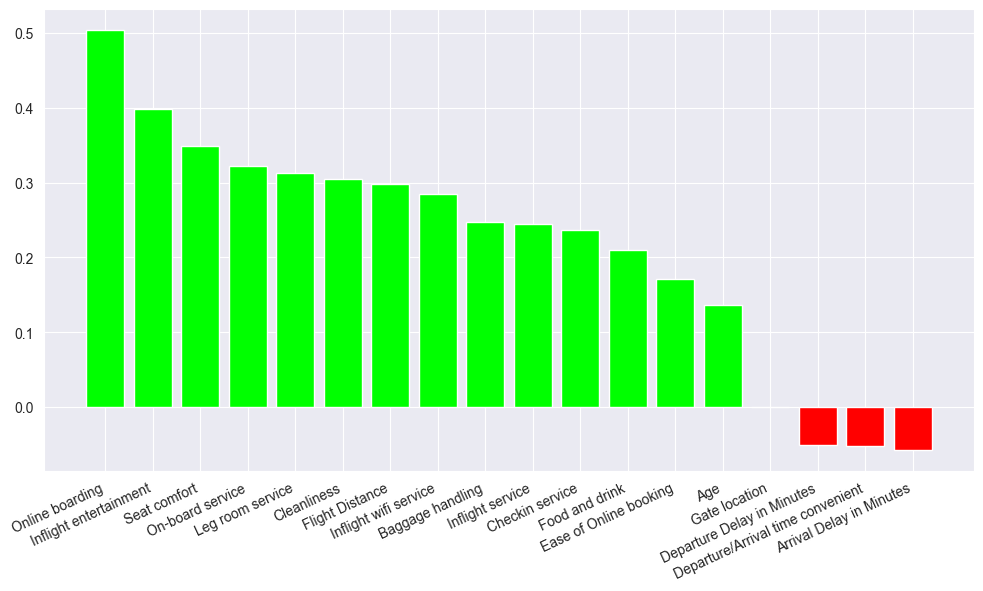

In [8]:
satisfaction_map = {
    "neutral or dissatisfied": 0,
    "satisfied":1
}
numeric_df= df.select_dtypes(include= ['int64', 'float64']).drop(columns=['id','Unnamed: 0'])




correlations = numeric_df.corrwith(df["satisfaction"].map(satisfaction_map)).sort_values(ascending= False)

colors = ['lime' if v > 0 else 'red' for v in correlations]
#print(correlations)

sum = 0

""" for val1, val2 in enumerate(correlations):
    sum += val2
print(sum) """


plt.figure(figsize = [12,6])
plt.bar(correlations.index, correlations, color = colors)
plt.xticks(rotation = 25, ha = "right")
plt.show()

# Ergebnisse
## Positive Korelationen
- Als beste Korelation lässt sich Online Boardinganführen mit einem Koeffizenten von 0.5 was daraufhin deutet, dass es keine gute Korelation giebt.

## Negative Korelationen
- Arrivel / Departure Delay korrelieren gegenteilig mit satisfaction, was bedeutet, dass sie bei erhöhung dazu führen, dass Menschen eher unsatisfied oder neutral or dissatified angeben.

In [9]:
columns = ["Arrival Delay in Minutes"]
size_column = "Departure/Arrival time convenient"
for column in columns:
    fig = px.scatter(df,x=column,y='Age',color='satisfaction', size=size_column, width=800, height=600)
    fig.show()

## Ergebnis 
Die Visualisierung bestätigt die Vermutung, dass die Zufriedenheit mit zunehmender Verspätung stark abfällt. Zwar gibt es vereinzelt Passagiere, die trotz hoher Verspätung zufrieden bleiben, doch diese bilden die Ausnahme.

Betrachtet man zusätzlich das Alter, fällt auf: Sehr junge sowie sehr alte Passagiere scheinen eine geringere Toleranzgrenze zu haben. In diesen Gruppen kippt die Stimmung tendenziell bereits nach deutlich kürzeren Wartezeiten in Unzufriedenheit um, während die Altersgruppe mittleren Alters (ca. 30–60 Jahre) etwas geduldiger erscheint.

Für diese Analyse haben wir uns auf die Variable Arrival Delay beschränkt, da zwischen Ankunfts- und Abflugverspätung (Departure Delay) eine Korrelation von 97 % besteht und beide Variablen somit nahezu identische Informationen liefern.

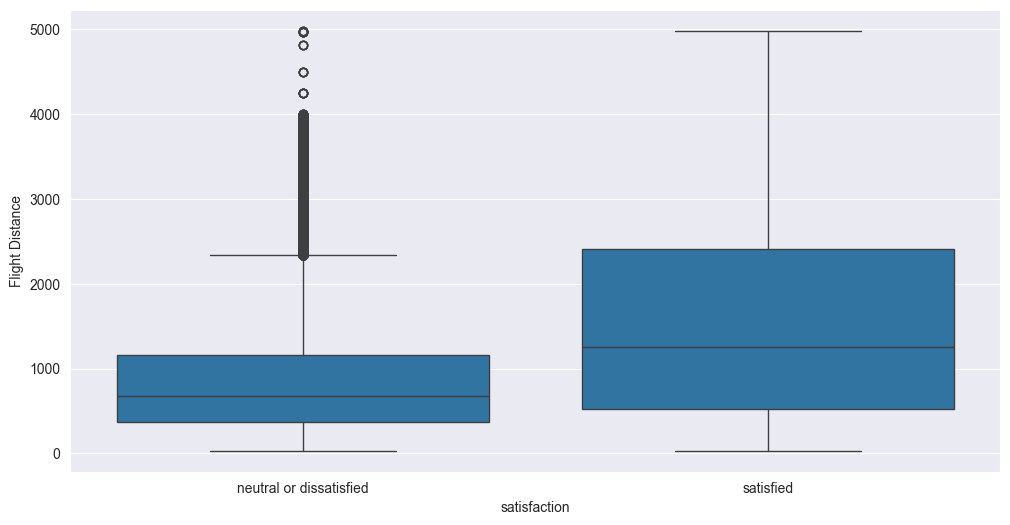

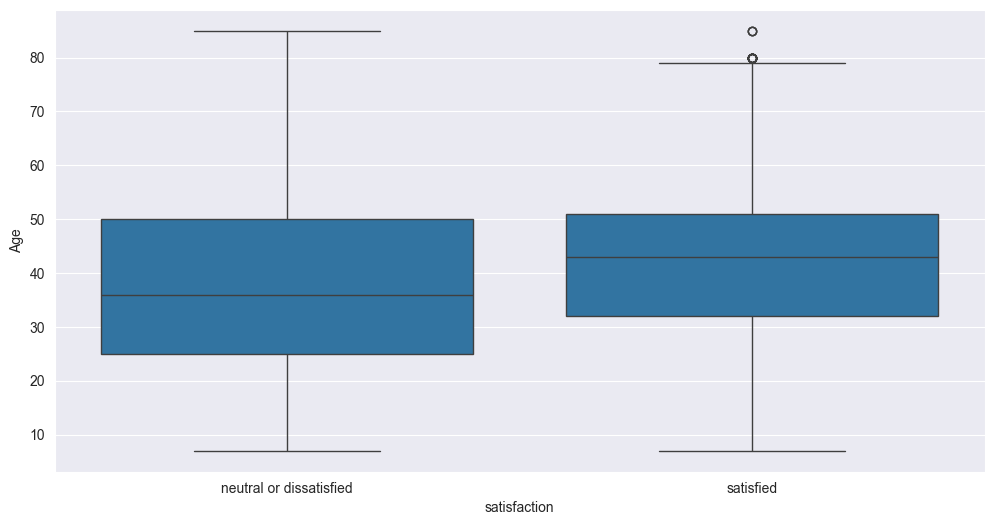

In [10]:
list_service_vars = ["Flight Distance",'Age']
for var in list_service_vars:
    plt.figure(figsize = [12,6])
    sns.boxplot(df, x= 'satisfaction', y=var)
    plt.show()

# Flight Distance
Die Flugdistanz erwies sich als starker Indikator für die Zufriedenheit. Unzufriedenheit tritt massiv gehäuft auf Kurzstreckenflügen auf (niedriger Median). Im Gegensatz dazu steigt die Chance auf zufriedene Kunden bei Langstreckenflügen signifikant an.

# Age
Es zeigt sich ein deutlicher Zusammenhang zwischen Alter und Zufriedenheit. Zufriedene Passagiere sind im Durchschnitt („Median“) deutlich älter (ca. 40–45 Jahre) als neutrale oder unzufriedene Passagiere (ca. 26–30 Jahre). Dies deutet darauf hin, dass jüngere Zielgruppen kritischer sind oder andere Ansprüche an das Reiseerlebnis stellen.

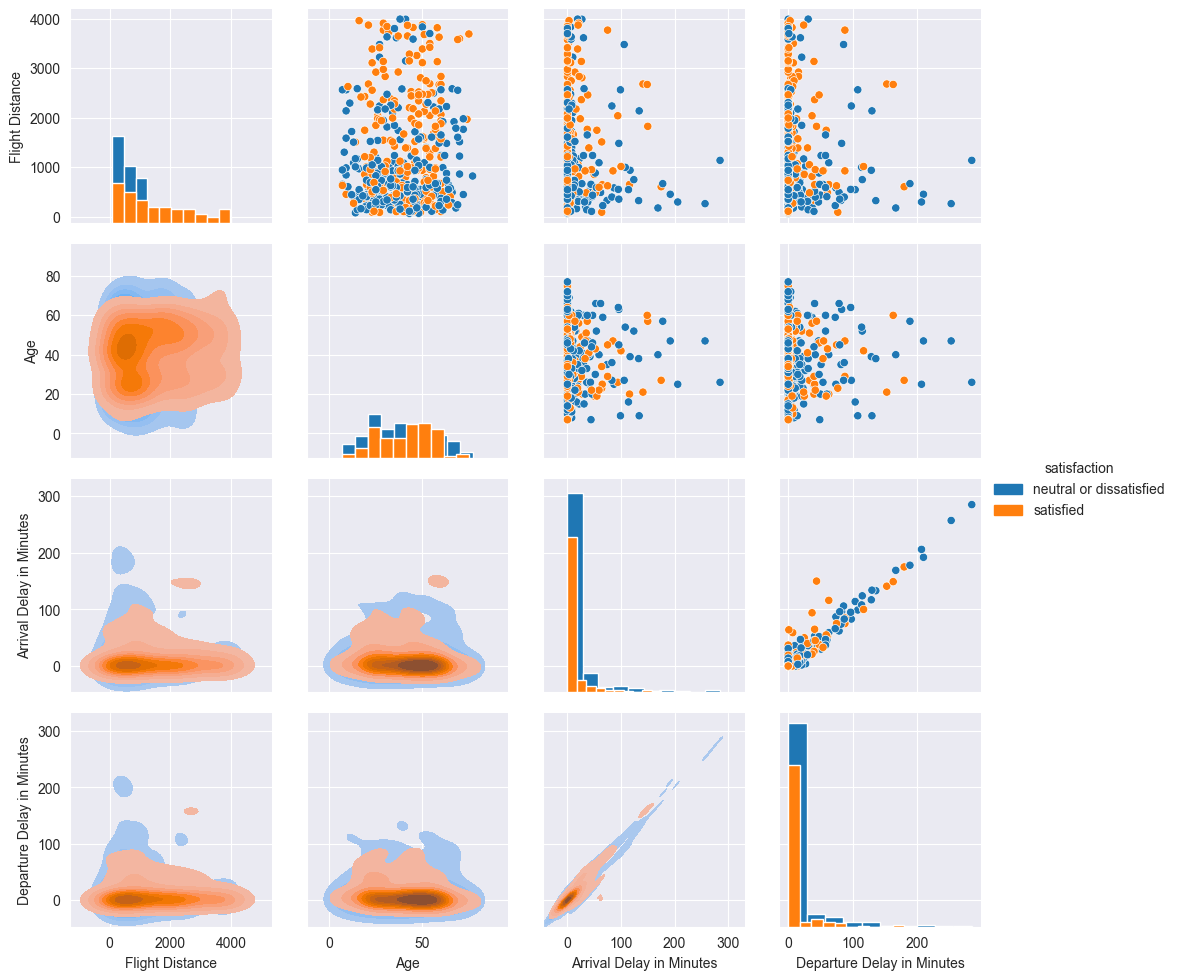

In [11]:
columns = ["Flight Distance","Age","Arrival Delay in Minutes", "Departure Delay in Minutes"]
sample_df = df.sample(n=500, random_state=42)

giant_grid = sns.PairGrid(sample_df, hue = "satisfaction", vars = columns)
giant_grid.map_diag(plt.hist)
giant_grid.map_upper(sns.scatterplot)
giant_grid.map_lower(sns.kdeplot, fill = True)
giant_grid.add_legend()
plt.show()

## Letztes Plot
Dieses umfangreiche Pairplot bietet die Möglichkeit, mehrere unserer vorherigen Darstellungen wiederzuerkennen und alle relevanten Variablen noch einmal kompakt auf einen Blick zu betrachten. Besonders der KDE-Plot im unteren Dreieck liefert einen zusätzlichen Mehrwert: Durch die Dichtevisualisierung werden Überlagerungen und Muster deutlich erkennbarer als in reinen Scatterplots. Bereiche mit hoher Datendichte lassen sich so leichter identifizieren.

Zusammenfassend lässt sich sagen, dass dieses Plot vor allem als Übersichts- und Orientierungsinstrument sinnvoll ist. Es greift viele zuvor gezeigte Zusammenhänge erneut auf, jedoch in einer Form, die eher einen globalen Überblick erlaubt. Für die Analyse einzelner Werte oder feiner Details ist es weniger geeignet, da die Vielzahl der Datenpunkte die exakte Betrachtung erschwert.